In [25]:
# importing required libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
#reading the car data from csv file
data=pd.read_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\Chennai.csv')
data

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Compression Ratio,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,9.9:1,No,1280mm,1290mm,1540kg,4.5 metres,145 Kmph,15.7 Seconds,NaN,NaN
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,9.9:1,No,1280mm,1290mm,1540kg,5.0,145 Kmph,11.7,72.2 x 81.3,NaN
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,9.9:1,No,1400mm,1385mm,1540kg,4.7 metres,165 Kmph,14.3 Seconds,72.2 x 81.3,NaN
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,9.9:1,No,1400mm,1385mm,1540kg,5.1 meters,172 Kmph,13.7 Seconds,72.2 x 81.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,0,Petrol,Hatchback,"42,891",Automatic,1,1st Owner,Maruti,Maruti Swift,2018,...,16:1,No,1530mm,1530mm,1315kg,4.8 Meters,242 Kmph,7.5 Seconds,75 X 79 mm,184mm
1415,0,Diesel,SUV,"59,100",Manual,1,1st Owner,Renault,Renault Duster,2018,...,16:1,No,1560mm,1567mm,1777kg,5.2 metres,156 Kmph,13.9 Seconds,75 X 79 mm,184mm
1416,0,Petrol,SUV,"55,913",Automatic,1,1st Owner,Tata,Tata Nexon,2018,...,16:1,No,1540 mm,1530 mm,1777kg,5.1m,154.19 kmph,13.9 Seconds,77x85.8,209 mm
1417,0,Diesel,SUV,"65,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Tiguan,2017,...,16:1,No,1578mm,1568mm,2250kg,5.75meters,154.19 kmph,13.9 Seconds,74.5 x 81 mm,209 mm


In [27]:
# dropping columns -Feature selection
Chennai_final_data=data.drop(columns=['it', 'ft', 'transmission', 'owner', 'centralVariantId', 'variantName',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Engine Displacement', 'Kms Driven',
       'Ownership', 'RTO', 'Registration Year', 'Seats',
       'Year of Manufacture', 'Features',
       'Torque', 'Seats.1', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'No Door Numbers', 'Cargo Volumn', 'Wheel Size',
       'Alloy Wheel Size', 'Ground Clearance Unladen'],inplace=True)



In [28]:
#selected features for further cleansing
data.columns

Index(['bt', 'km', 'ownerNo', 'oem', 'model', 'modelYear', 'price',
       'Fuel Type', 'Insurance Validity', 'Transmission', 'Engine',
       'Max Power', 'Color', 'Seating Capacity', 'Mileage'],
      dtype='object')

In [29]:
data.isnull().sum()  # check for null records 

bt                    0
km                    0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Fuel Type             0
Insurance Validity    0
Transmission          0
Engine                0
Max Power             0
Color                 0
Seating Capacity      0
Mileage               1
dtype: int64

In [30]:
data.dtypes

bt                    object
km                    object
ownerNo                int64
oem                   object
model                 object
modelYear              int64
price                 object
Fuel Type             object
Insurance Validity    object
Transmission          object
Engine                object
Max Power             object
Color                 object
Seating Capacity       int64
Mileage               object
dtype: object

In [31]:
# column name renaming as part of standaradization
dict={'bt':'Car_type',
      'km':'Kms_driven',
      'ownerNo':'No_of_owners',
      'model':'Car_model',
      'oem':'Car_name',
      'modelYear':'Model_Year',
      'price':'Car_price',
      'Fuel Type':'Fuel_type',
      'Insurance Validity':'Insurance_type',
      'Seating Capacity':'Seating_capacity',
      'Max Power':'Max_power'
      }
data.rename(columns =dict , inplace = True)


data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Engine,Max_power,Color,Seating_capacity,Mileage
0,SUV,"20,000",1,Kia,Kia Sonet,2022,₹ 11.50 Lakh,Petrol,Third Party insurance,Automatic,998 CC,118.36bhp@6000rpm,Black,5,NaN
1,Minivans,"20,687",1,Maruti,Maruti Eeco,2015,₹ 4.15 Lakh,Petrol,Comprehensive,Manual,1196 CC,73bhp@6000rpm,Grey,7,15.37 kmpl
2,SUV,"30,000",1,Nissan,Nissan Magnite,2021,₹ 7.50 Lakh,Petrol,Third Party insurance,Manual,999 CC,98.63bhp@5000rpm,Others,5,20 kmpl
3,Hatchback,"59,247",1,Hyundai,Hyundai i10,2015,₹ 3.98 Lakh,Petrol,Comprehensive,Manual,1086 CC,68.05bhp@5500rpm,Silver,5,19.81 kmpl
4,Hatchback,"50,000",1,Honda,Honda Jazz,2015,₹ 5.50 Lakh,Petrol,Third Party insurance,Manual,1199 CC,88.7bhp@6000rpm,Others,5,18.7 kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,Hatchback,"42,891",1,Maruti,Maruti Swift,2018,₹ 6.20 Lakh,Petrol,Third Party insurance,Automatic,1197 CC,81.80bhp@6000rpm,Blue,5,22 kmpl
1415,SUV,"59,100",1,Renault,Renault Duster,2018,₹ 8.90 Lakh,Diesel,Third Party insurance,Manual,1461 CC,83.8bhp@3750rpm,Orange,5,19.87 kmpl
1416,SUV,"55,913",1,Tata,Tata Nexon,2018,₹ 8.01 Lakh,Petrol,Not Available,Automatic,1198 CC,108.5bhp@5000rpm,White,5,17 kmpl
1417,SUV,"65,000",1,Volkswagen,Volkswagen Tiguan,2017,₹ 20.50 Lakh,Diesel,Comprehensive,Automatic,1968 CC,141bhp@4000rpm,Grey,5,16.65 kmpl


In [32]:
# Function to convert lakh to numerical format
def convert_lakh_to_numeric(value):
    if 'lakh' in value:
        num = float(value.replace(' lakh', '').strip().replace(',', ''))
        return int(num * 100000)
    elif 'crore' in value:
        num = float(value.replace(' crore', '').strip().replace(',', ''))
        return int(num * 10000000)
    return value


In [33]:

# Function to extract and convert max power in PS to BHP 
import re
import numpy as np
def extract_and_convert(power_str):
    # Check for BHP
    bhp_match = re.search(r'(\d+\.?\d*)\s*bhp', power_str, re.IGNORECASE)
    if bhp_match:
        return float(bhp_match.group(1))  # Return BHP as float
    
    # Check for PS, allow for variations in format
    ps_match = re.search(r"(\d+(\.\d*)?)", power_str, re.IGNORECASE)
    if ps_match:
        print(f"{power_str} --> {ps_match}")
        ps_value = float(ps_match.group(1).replace(',', ''))  # Remove commas
        return ps_value * 0.98632  # Convert PS to BHP
    
    return np.nan  # Return NaN if no match

In [34]:
# Column data type conversion with regex replace to get numerical data
data['Max_power']=data['Max_power'].apply(extract_and_convert).astype(float)

85 PS @ 6000 rpm  --> <re.Match object; span=(0, 2), match='85'>
90 PS @ 6000 rpm --> <re.Match object; span=(0, 2), match='90'>
142 @ 4,000 (PS@rpm) --> <re.Match object; span=(0, 3), match='142'>
210@4000 (PS@rpm) --> <re.Match object; span=(0, 3), match='210'>
118PS at 6,600 rpm --> <re.Match object; span=(0, 3), match='118'>
70@4,500 (PS@rpm) --> <re.Match object; span=(0, 2), match='70'>
102@3,600 (PS@rpm) --> <re.Match object; span=(0, 3), match='102'>
102@3,600 (PS@rpm) --> <re.Match object; span=(0, 3), match='102'>
235 @ 4,000 (PS@rpm) --> <re.Match object; span=(0, 3), match='235'>
105 @ 4,000 (PS@rpm) --> <re.Match object; span=(0, 3), match='105'>
118PS at 6,600 rpm --> <re.Match object; span=(0, 3), match='118'>
174.33@3750rpm --> <re.Match object; span=(0, 6), match='174.33'>
90PS at 4000rpm --> <re.Match object; span=(0, 2), match='90'>
63 HP at 3200 rpm --> <re.Match object; span=(0, 2), match='63'>
65@5000 (PS@rpm) --> <re.Match object; span=(0, 2), match='65'>
80 PS a

In [35]:
data['Engine']=data['Engine'].str.replace(r'[^\d]','',regex=True).astype(int)

In [36]:
# Column data type conversion with regex replace to get numerical data
data['Car_price'] = data['Car_price'].str.lower().replace(r'[^\d.a-zA-Z ]','',regex=True).apply(convert_lakh_to_numeric).astype(int)
data['Mileage']=data['Mileage'].str.lower().replace(r'[^\d.]','',regex=True).astype(float)
data['Kms_driven']=data['Kms_driven'].str.replace(r'[^\d]','',regex=True).astype(int)
data.head()

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Engine,Max_power,Color,Seating_capacity,Mileage
0,SUV,20000,1,Kia,Kia Sonet,2022,1150000,Petrol,Third Party insurance,Automatic,998,118.36,Black,5,NaN
1,Minivans,20687,1,Maruti,Maruti Eeco,2015,415000,Petrol,Comprehensive,Manual,1196,73.00,Grey,7,15.37
2,SUV,30000,1,Nissan,Nissan Magnite,2021,750000,Petrol,Third Party insurance,Manual,999,98.63,Others,5,20.00
3,Hatchback,59247,1,Hyundai,Hyundai i10,2015,398000,Petrol,Comprehensive,Manual,1086,68.05,Silver,5,19.81
4,Hatchback,50000,1,Honda,Honda Jazz,2015,550000,Petrol,Third Party insurance,Manual,1199,88.70,Others,5,18.70


In [168]:
data.columns

Index(['Car_type', 'Kms_driven', 'No_of_owners', 'Car_name', 'Car_model',
       'Model_Year', 'Car_price', 'Fuel_type', 'Insurance_type',
       'Transmission', 'Engine', 'Max_power', 'Color', 'Seating_capacity',
       'Mileage'],
      dtype='object')

In [169]:
data.dtypes

Car_type             object
Kms_driven            int64
No_of_owners          int64
Car_name             object
Car_model            object
Model_Year            int64
Car_price             int64
Fuel_type            object
Insurance_type       object
Transmission         object
Engine                int64
Max_power           float64
Color                object
Seating_capacity      int64
Mileage             float64
dtype: object

In [170]:
data.to_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\final_cleaned_csv_files\edited_cdata.csv',encoding='utf-8',index=False)

In [171]:
data.shape

(1419, 15)

In [172]:
print(data['No_of_owners'].unique())

[1 2 3 4 0 5]


In [173]:
print(data['Transmission'].unique())

['Automatic' 'Manual']


In [174]:
print(data['Model_Year'].unique())

[2022 2015 2021 2016 2010 2018 2019 2020 2017 2014 2013 2008 2011 2012
 2007 2009 2023 2002 2004 2006 2003 2005]


In [175]:
print(data['Fuel_type'].unique())

['Petrol' 'Diesel' 'Electric' 'CNG']


In [38]:
print(data['Car_type'].unique())

['SUV' 'Minivans' 'Hatchback' 'Sedan' 'MUV' 'Hybrids' 'Coupe']


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_type          1419 non-null   object 
 1   Kms_driven        1419 non-null   int64  
 2   No_of_owners      1419 non-null   int64  
 3   Car_name          1419 non-null   object 
 4   Car_model         1419 non-null   object 
 5   Model_Year        1419 non-null   int64  
 6   Car_price         1419 non-null   int64  
 7   Fuel_type         1419 non-null   object 
 8   Insurance_type    1419 non-null   object 
 9   Transmission      1419 non-null   object 
 10  Engine            1419 non-null   int64  
 11  Max_power         1419 non-null   float64
 12  Color             1419 non-null   object 
 13  Seating_capacity  1419 non-null   int64  
 14  Mileage           1418 non-null   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 166.4+ KB


In [178]:
data.describe

<bound method NDFrame.describe of        Car_type  Kms_driven  No_of_owners    Car_name          Car_model  \
0           SUV       20000             1         Kia          Kia Sonet   
1      Minivans       20687             1      Maruti        Maruti Eeco   
2           SUV       30000             1      Nissan     Nissan Magnite   
3     Hatchback       59247             1     Hyundai        Hyundai i10   
4     Hatchback       50000             1       Honda         Honda Jazz   
...         ...         ...           ...         ...                ...   
1414  Hatchback       42891             1      Maruti       Maruti Swift   
1415        SUV       59100             1     Renault     Renault Duster   
1416        SUV       55913             1        Tata         Tata Nexon   
1417        SUV       65000             1  Volkswagen  Volkswagen Tiguan   
1418      Sedan       60000             1         BMW    BMW 3 Series GT   

      Model_Year  Car_price Fuel_type         Insuran

In [179]:
data.describe()

,Kms_driven,No_of_owners,Model_Year,Car_price,Engine,Max_power,Seating_capacity,Mileage
count,1.419000e+03,1419.000000,1419.000000,1.419000e+03,1419.000000,1419.000000,1419.000000,1418.000000
mean,6.418851e+04,1.318534,2016.718111,1.013402e+06,1410.510218,105.019917,5.190980,19.245331
std,1.610339e+05,0.613680,3.597057,1.249842e+06,445.353188,45.166257,0.620094,3.364679
min,3.000000e+02,0.000000,2002.000000,4.500000e+04,0.000000,37.000000,4.000000,7.810000
25%,3.041400e+04,1.000000,2015.000000,4.450000e+05,1197.000000,78.905600,5.000000,17.030000
50%,5.381900e+04,1.000000,2017.000000,6.430000e+05,1199.000000,88.700000,5.000000,18.900000
75%,8.000000e+04,2.000000,2019.000000,9.500000e+05,1498.000000,117.600000,5.000000,21.400000
max,5.500000e+06,5.000000,2023.000000,1.180000e+07,4663.000000,459.000000,10.000000,28.400000


In [40]:
# Descriptive statistical summary of categorical features
data.describe(include= 'object')

,Car_type,Car_name,Car_model,Fuel_type,Insurance_type,Transmission,Color
count,1419,1419,1419,1419,1419,1419,1419
unique,7,30,201,4,5,2,40
top,Hatchback,Maruti,Honda City,Petrol,Comprehensive,Manual,White
freq,593,319,67,973,705,995,269


In [43]:
# calculating vehicle age as feature
from datetime import datetime

current_year = datetime.now().year

# Calculate age
data['Vehicle_age']= current_year - data['Model_Year']
data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Engine,Max_power,Color,Seating_capacity,Mileage,Vehicle_age
0,SUV,20000,1,Kia,Kia Sonet,2022,1150000,Petrol,Third Party insurance,Automatic,998,118.36,Black,5,NaN,2
1,Minivans,20687,1,Maruti,Maruti Eeco,2015,415000,Petrol,Comprehensive,Manual,1196,73.00,Grey,7,15.37,9
2,SUV,30000,1,Nissan,Nissan Magnite,2021,750000,Petrol,Third Party insurance,Manual,999,98.63,Others,5,20.00,3
3,Hatchback,59247,1,Hyundai,Hyundai i10,2015,398000,Petrol,Comprehensive,Manual,1086,68.05,Silver,5,19.81,9
4,Hatchback,50000,1,Honda,Honda Jazz,2015,550000,Petrol,Third Party insurance,Manual,1199,88.70,Others,5,18.70,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,Hatchback,42891,1,Maruti,Maruti Swift,2018,620000,Petrol,Third Party insurance,Automatic,1197,81.80,Blue,5,22.00,6
1415,SUV,59100,1,Renault,Renault Duster,2018,890000,Diesel,Third Party insurance,Manual,1461,83.80,Orange,5,19.87,6
1416,SUV,55913,1,Tata,Tata Nexon,2018,801000,Petrol,Not Available,Automatic,1198,108.50,White,5,17.00,6
1417,SUV,65000,1,Volkswagen,Volkswagen Tiguan,2017,2050000,Diesel,Comprehensive,Automatic,1968,141.00,Grey,5,16.65,7


In [42]:
# Feature Engineering steps

data_next=data.copy()

# dropping unnecessary features for further analysis

data_next.drop(columns= ['Car_name','Model_Year','Car_model','Color'],axis= 1, inplace= True) 
data_next

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Engine,Max_power,Seating_capacity,Mileage,Vehicle_age
0,SUV,20000,1,1150000,Petrol,Third Party insurance,Automatic,998,118.36,5,NaN,2
1,Minivans,20687,1,415000,Petrol,Comprehensive,Manual,1196,73.00,7,15.37,9
2,SUV,30000,1,750000,Petrol,Third Party insurance,Manual,999,98.63,5,20.00,3
3,Hatchback,59247,1,398000,Petrol,Comprehensive,Manual,1086,68.05,5,19.81,9
4,Hatchback,50000,1,550000,Petrol,Third Party insurance,Manual,1199,88.70,5,18.70,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,Hatchback,42891,1,620000,Petrol,Third Party insurance,Automatic,1197,81.80,5,22.00,6
1415,SUV,59100,1,890000,Diesel,Third Party insurance,Manual,1461,83.80,5,19.87,6
1416,SUV,55913,1,801000,Petrol,Not Available,Automatic,1198,108.50,5,17.00,6
1417,SUV,65000,1,2050000,Diesel,Comprehensive,Automatic,1968,141.00,5,16.65,7


In [183]:
print("'Vehicle age' variable have {} unique category : {}".format(data_next['Vehicle_age'].nunique(), 
                                                                   data_next['Vehicle_age'].unique()))

'Vehicle age' variable have 22 unique category : [ 2  9  3  8 14  6  5  4  7 10 11 16 13 12 17 15  1 22 20 18 21 19]


In [184]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Engine,Max_power,Seating_capacity,Mileage,Vehicle_age
0,SUV,20000,1,1150000,Petrol,Third Party insurance,Automatic,998,118.36,5,NaN,2
1,Minivans,20687,1,415000,Petrol,Comprehensive,Manual,1196,73.00,7,15.37,9
2,SUV,30000,1,750000,Petrol,Third Party insurance,Manual,999,98.63,5,20.00,3
3,Hatchback,59247,1,398000,Petrol,Comprehensive,Manual,1086,68.05,5,19.81,9
4,Hatchback,50000,1,550000,Petrol,Third Party insurance,Manual,1199,88.70,5,18.70,9


Data Visualization

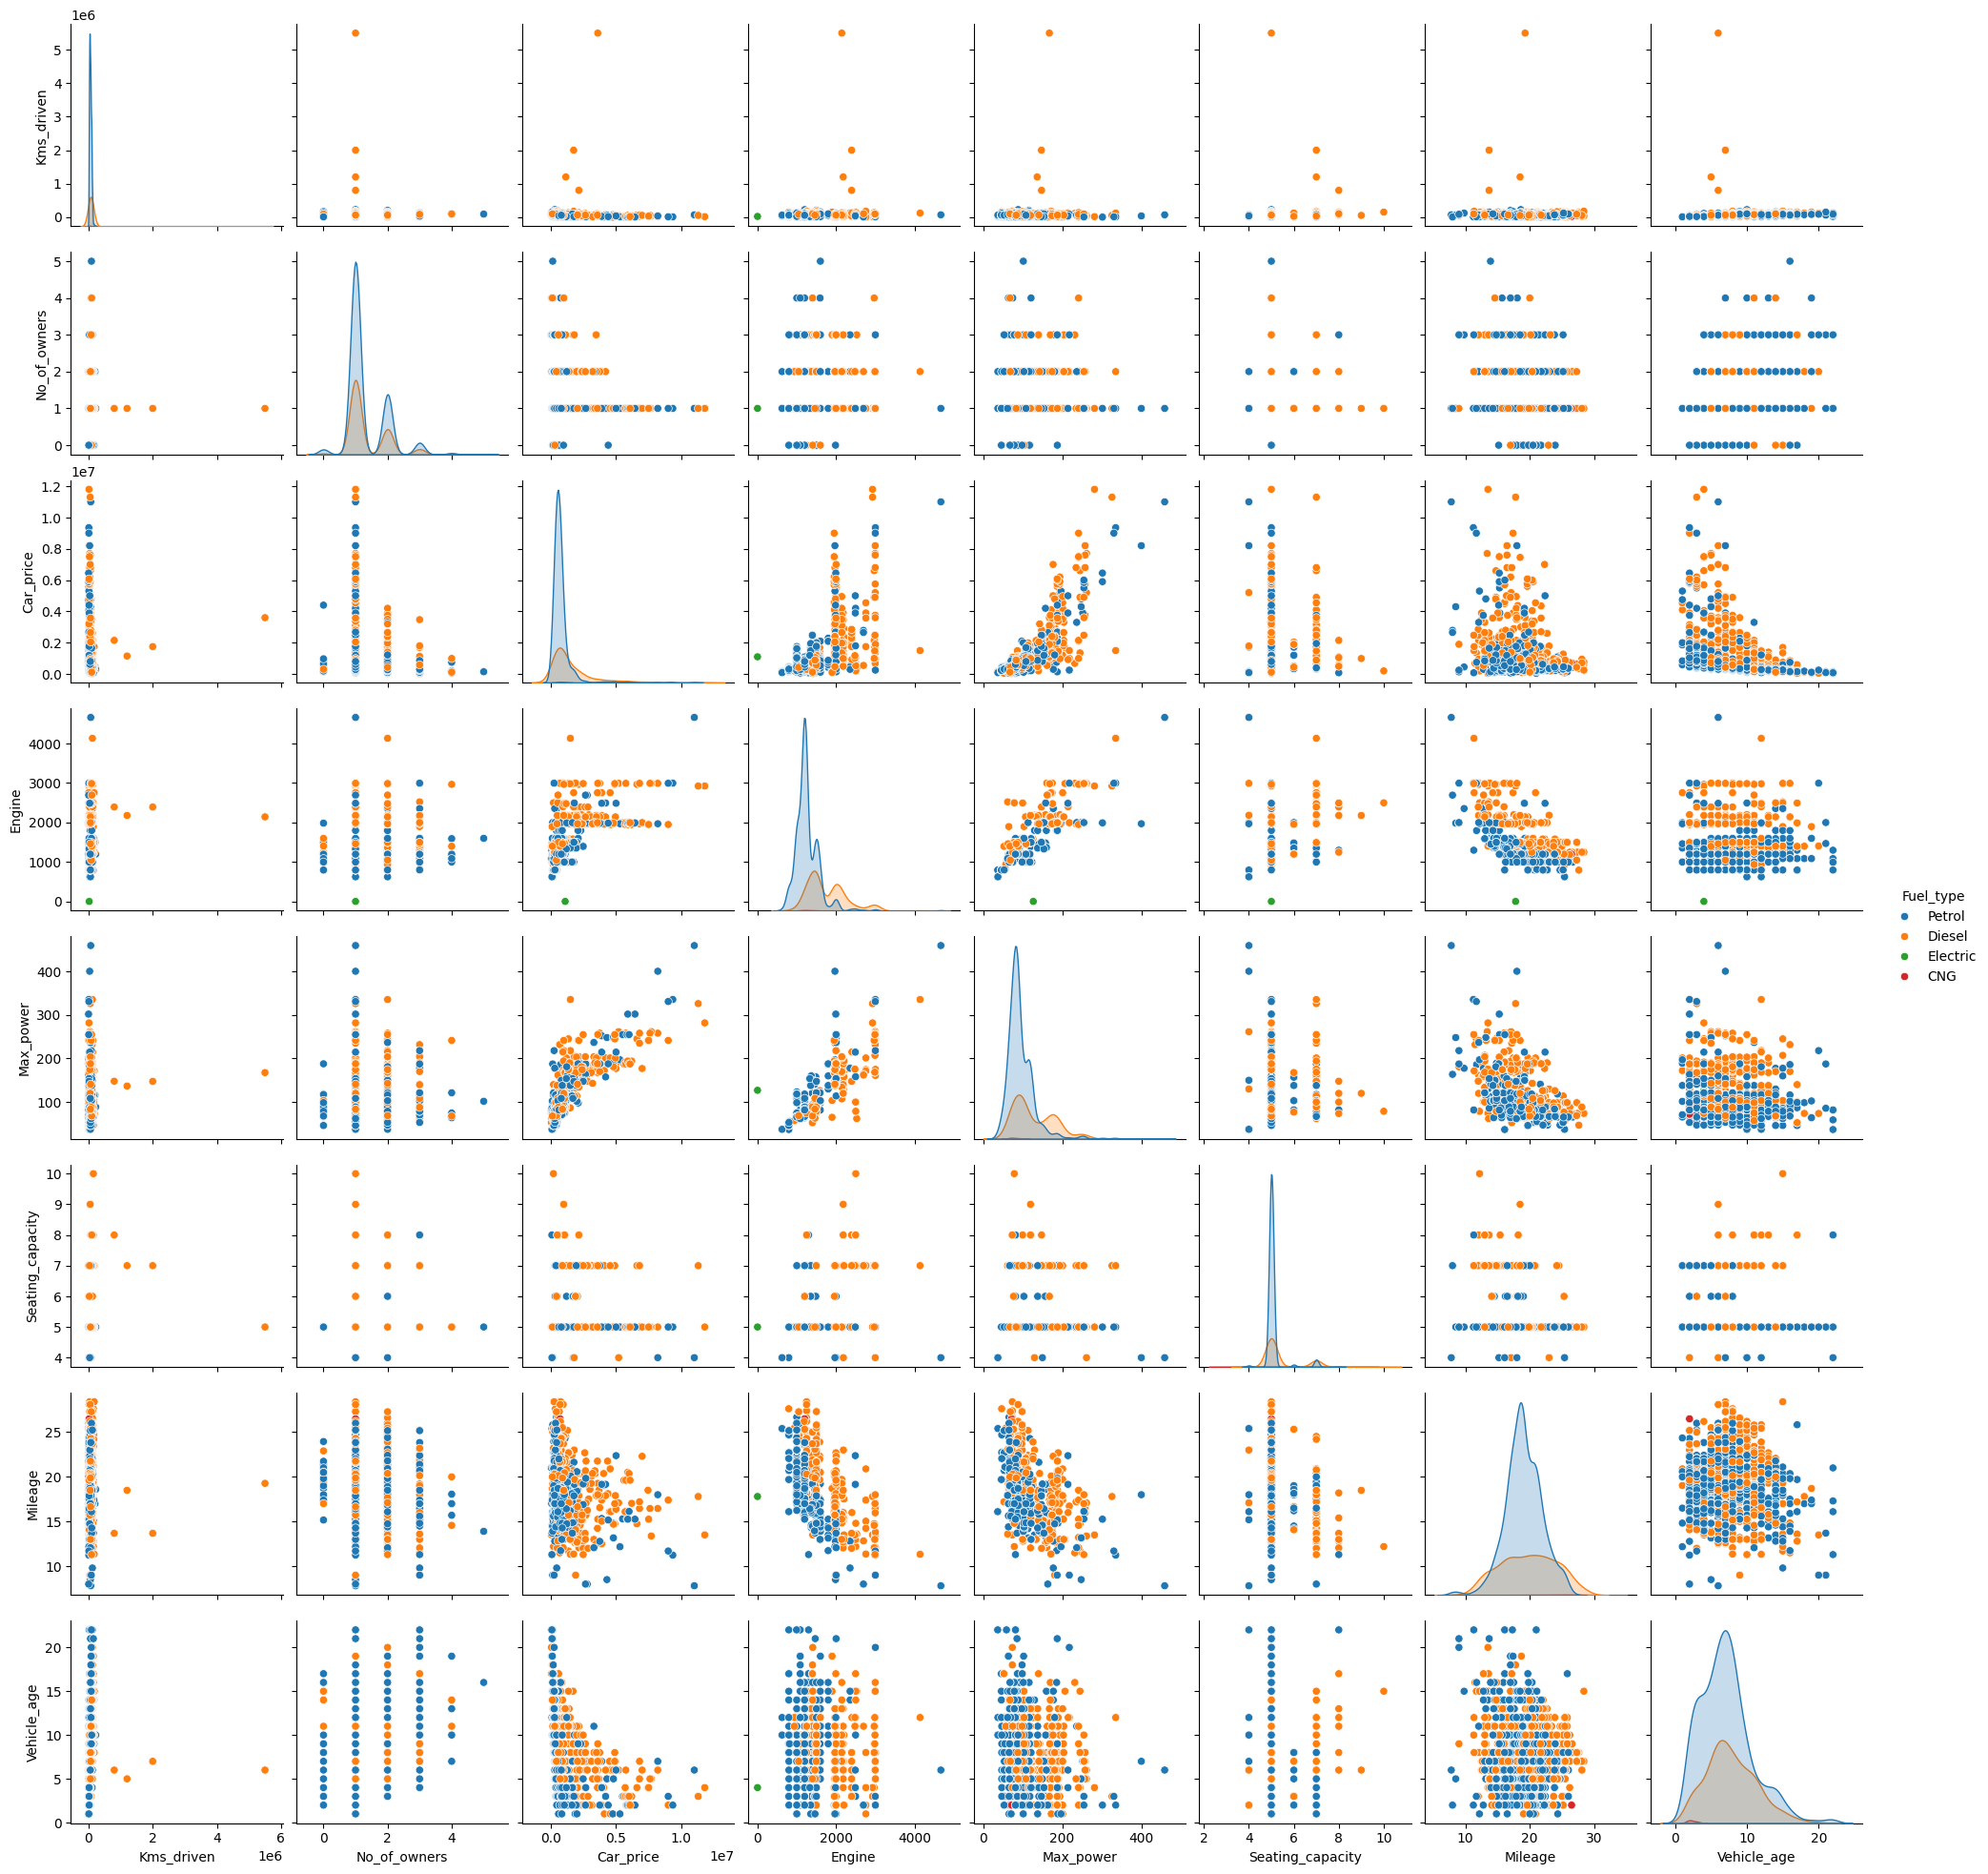

In [186]:
sns.pairplot(data=data_next, hue= 'Fuel_type', diag_kind= 'kde')

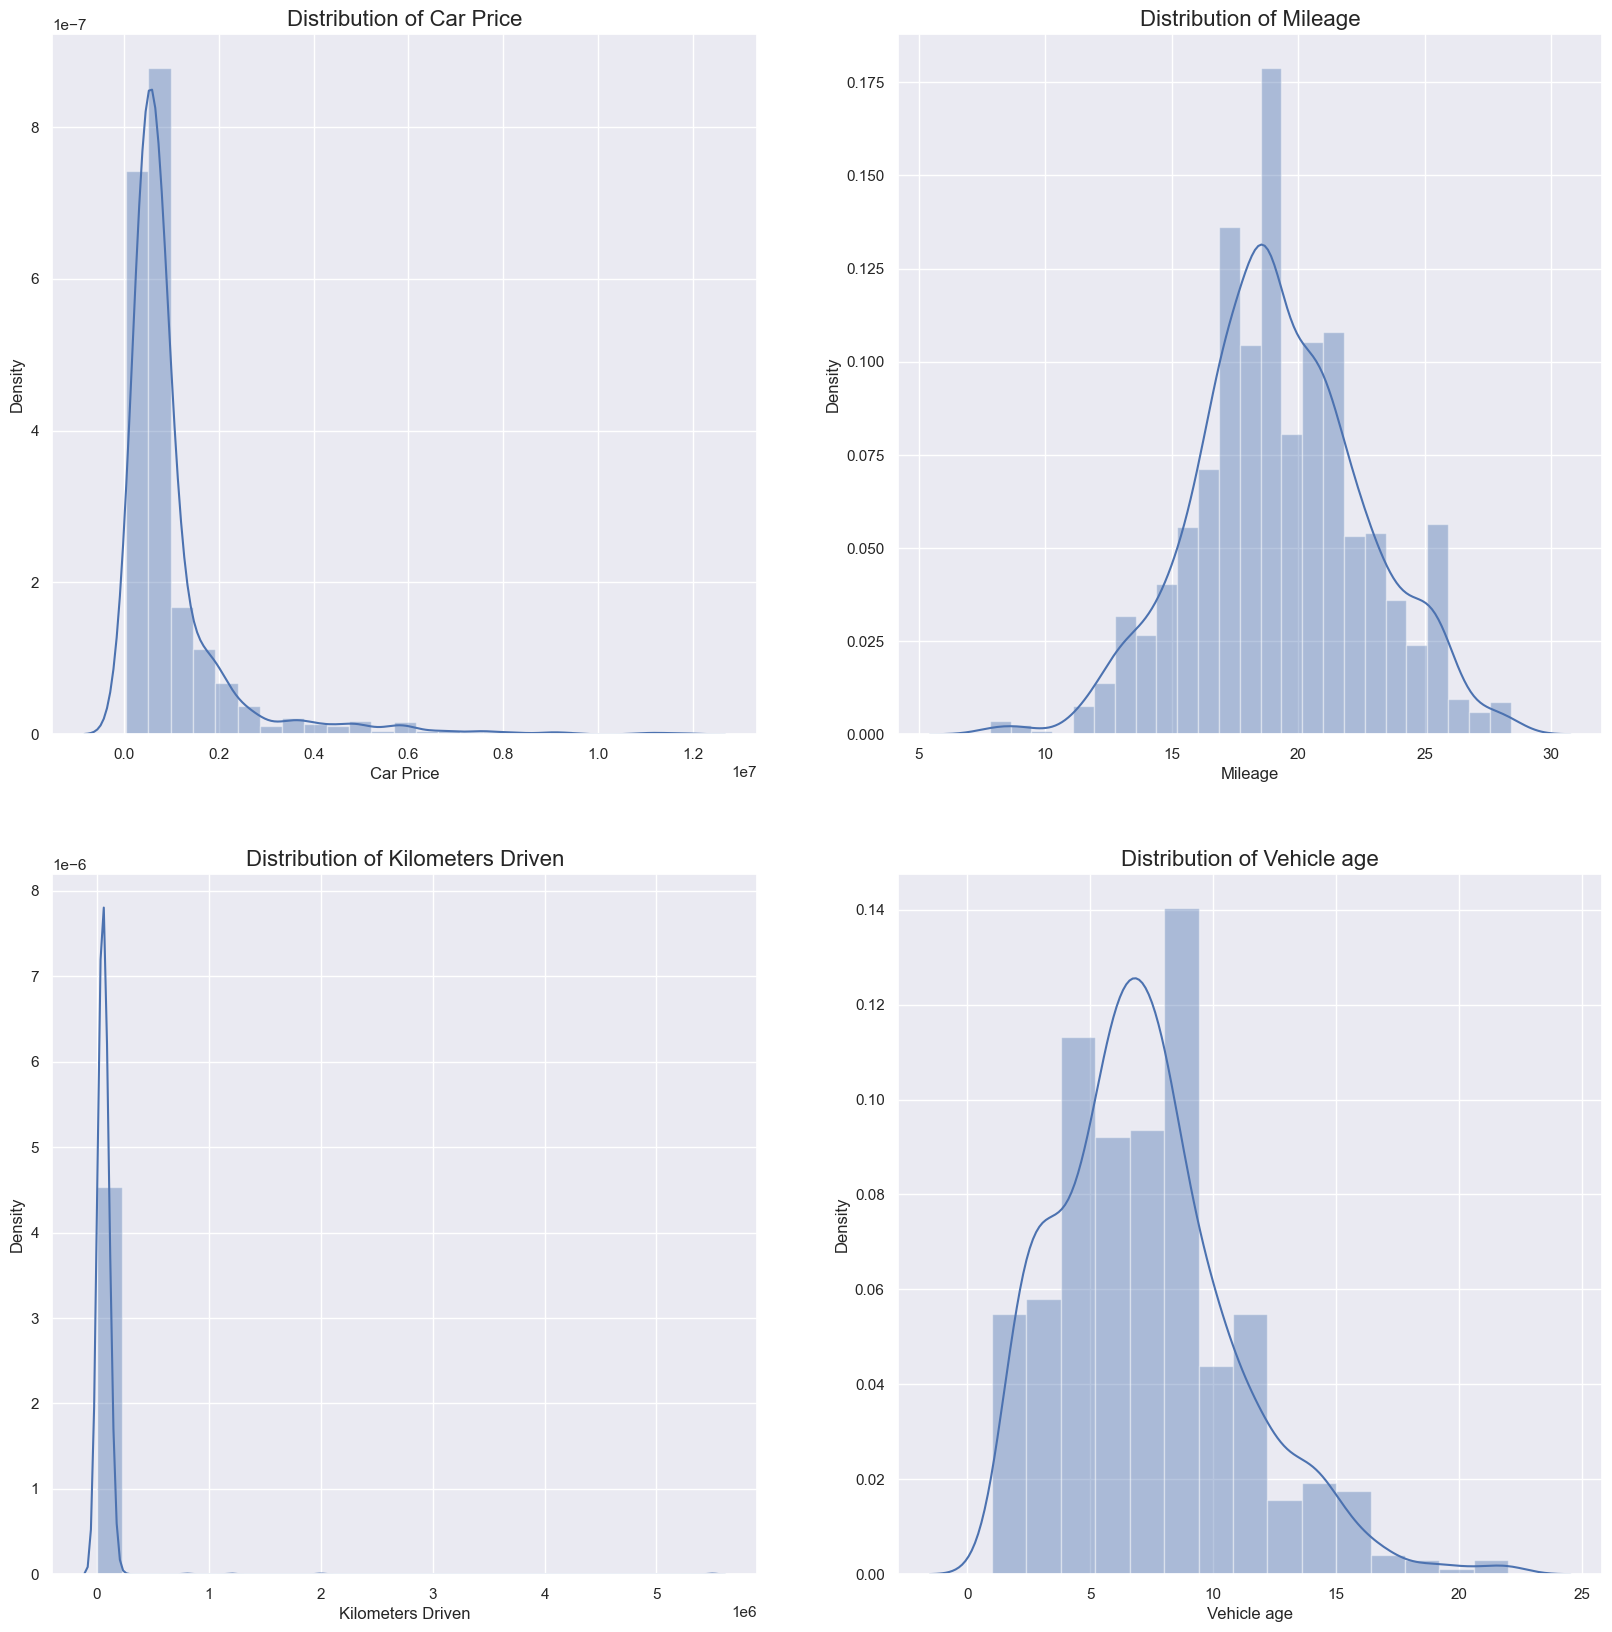

In [188]:
# Let's see the distribution of the variables from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distplot of 'Selling_Price' feature
k1 = sns.distplot(a = data_next['Car_price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Car Price', fontsize=16)
ax0.set(xlabel= 'Car Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Mileage' feature
k2 = sns.distplot(a = data_next['Mileage'], bins= 25, ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Mileage', fontsize=16)
ax1.set(xlabel= 'Mileage', ylabel= 'Density')

# Subplot 3: Distplot of 'Kms_Driven' feature
k1 = sns.distplot(a = data_next['Kms_driven'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 4: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = data_next['Vehicle_age'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Vehicle age', fontsize=16)
ax3.set(xlabel= 'Vehicle age', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")


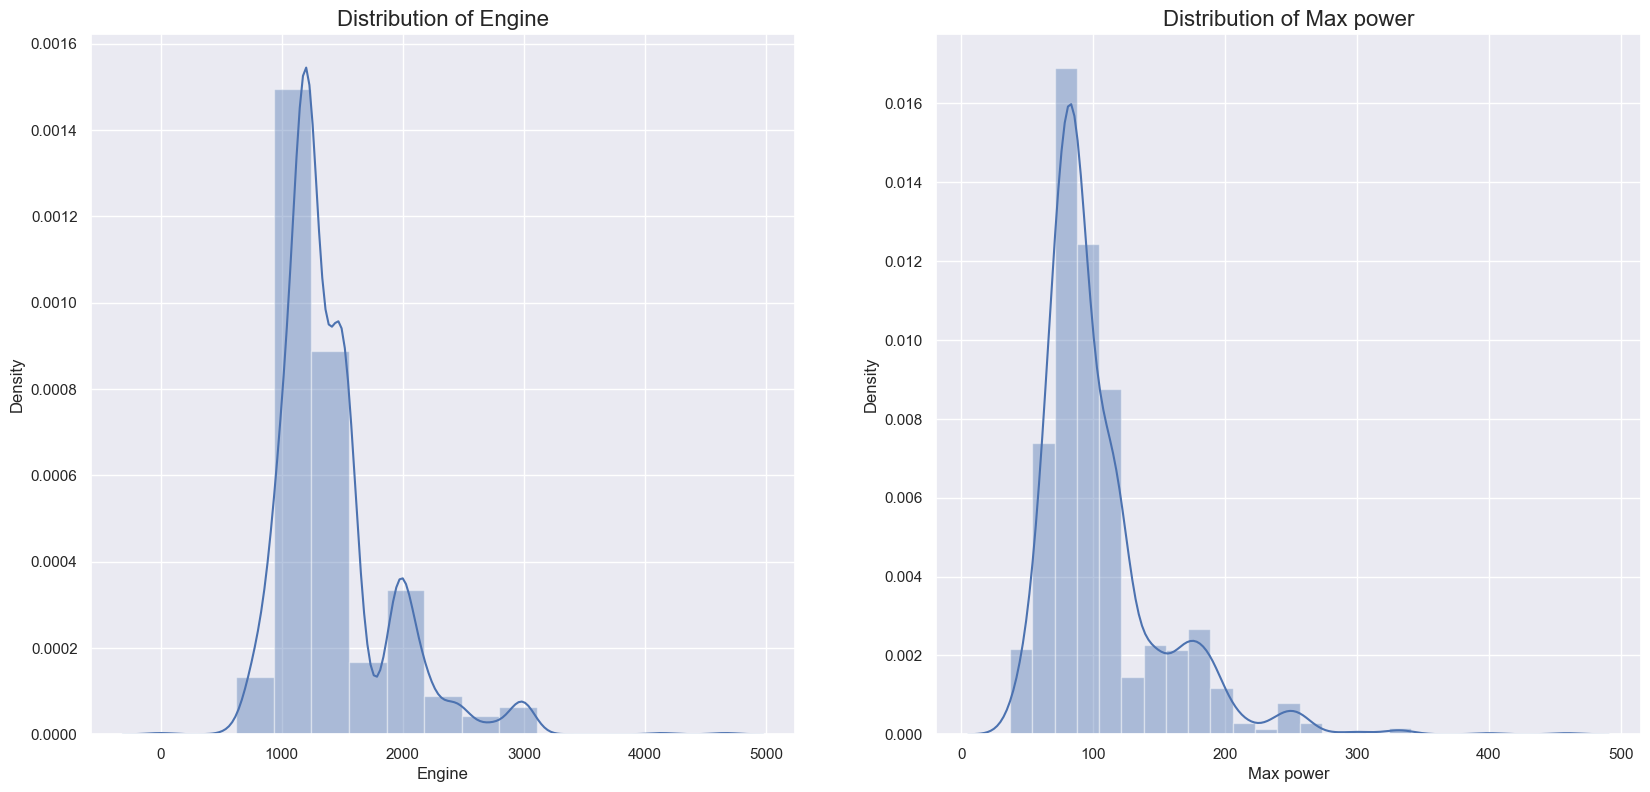

In [44]:
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)

# Subplot 5: Distplot of 'Engine' feature
k1 = sns.distplot(a = data_next['Engine'], bins= 15, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Engine', fontsize=16)
ax0.set(xlabel= 'Engine', ylabel= 'Density')

# Subplot 6: Distplot of 'Max power' feature
k2 = sns.distplot(a = data_next['Max_power'], bins=25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Max power', fontsize=16)
ax1.set(xlabel= 'Max power', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")

In [189]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Engine,Max_power,Seating_capacity,Mileage,Vehicle_age
0,SUV,20000,1,1150000,Petrol,Third Party insurance,Automatic,998,118.36,5,NaN,2
1,Minivans,20687,1,415000,Petrol,Comprehensive,Manual,1196,73.00,7,15.37,9
2,SUV,30000,1,750000,Petrol,Third Party insurance,Manual,999,98.63,5,20.00,3
3,Hatchback,59247,1,398000,Petrol,Comprehensive,Manual,1086,68.05,5,19.81,9
4,Hatchback,50000,1,550000,Petrol,Third Party insurance,Manual,1199,88.70,5,18.70,9


In [48]:
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)
cat_col

['Fuel_type', 'Insurance_type', 'Transmission', 'Car_type']

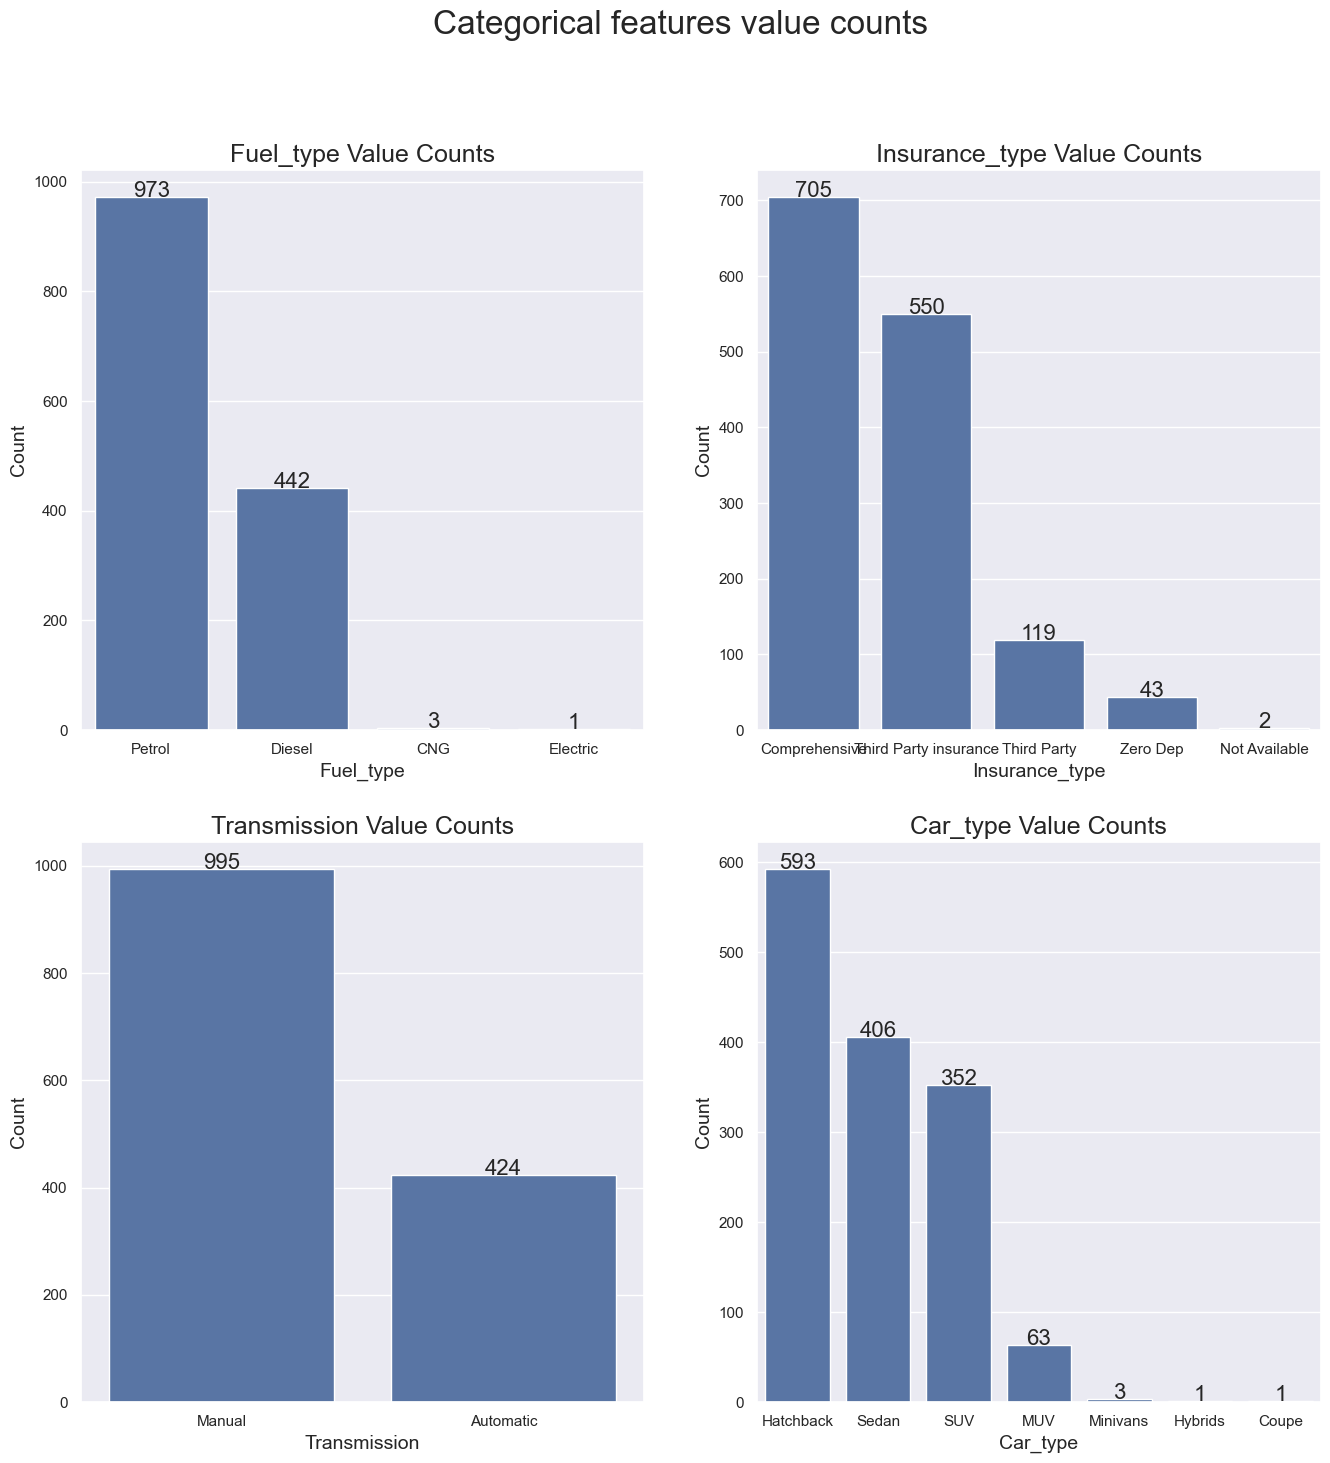

In [191]:
# Categorical data analysis
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)

fig = plt.figure(figsize= (16,16))
plt.suptitle('Categorical features value counts', fontsize = 24)
k=0
for i in range(1,5):
    ax = fig.add_subplot(2,2,i) 
    cat_order = data_next[cat_col[k]].value_counts()
    sns.countplot(data = data_next, x = cat_col[k], order = cat_order.index, ax= ax) 
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)
    
    for j in range(cat_order.shape[0]):
        count = cat_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=16)
    k=k+1